In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.optimize as so
import scipy.stats as ss
import copy
import json
import matplotlib

from tqdm import tqdm 
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [4]:
matplotlib.rc('font', **{'size' : 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

In [5]:
root = '/Users/Yannis/code/probabilistic_traffic_flow_modelling/'
output_dir = root+"data/output/experiment_data/"

In [6]:
data_fd = 'm25_data_fd_n392'
inference_fd = 'underwoods'
ti = True
T = 30
N = 300000
if ti:
    mcmc_file = output_dir+f'{data_fd}_fd_log_simulation_n200/'+f"grwmh_{inference_fd}_model_{data_fd}_sim_learn_noise_n200/thermodynamic_integration/thermodynamic_integration_theta.txt"
else:
    mcmc_file = output_dir+f'{data_fd}_fd_log_simulation_n200/'+f"grwmh_{inference_fd}_model_{data_fd}_sim_learn_noise_n200/theta.txt"

In [7]:
# # Read mcmc chain data
# chains = np.loadtxt(mcmc_file)

In [8]:
# # Reshape
# P = np.shape(chains)[1]
# chains = chains.reshape((N,T,P))
# print(f'N = {N}, T = {T}, P = {P}')

In [9]:
# # Apply transformation
# chain_transformed_mean = np.mean(chains,axis=0)
# chain_mean = np.exp(chain_transformed_mean)

# print(chain_mean)

## Posterior predictive plots

In [25]:
data_fd = "m25_data" 
experiment_type = "n392"
data_id = f'{data_fd}_fd_{experiment_type}'
inference_fd = 'delcastillos'
sensitivity = "regular"

In [26]:
# Import raw data
m25_data_file = root+f'data/output/fundamental_diagram_data/m25_data_fd_n392'

log_q = np.loadtxt((m25_data_file+"/log_q.txt"))
rho = np.loadtxt((m25_data_file+"/rho.txt"))

In [27]:
# Get model's posterior predictive
pp_file = output_dir + data_id+'/'+f'grwmh_{inference_fd}_model_{data_fd}_learn_noise_{experiment_type}_{sensitivity}_prior'
pp_mean = np.loadtxt((pp_file+"/posterior_predictive_mean.txt"))
pp_std = np.loadtxt((pp_file+"/posterior_predictive_std.txt"))

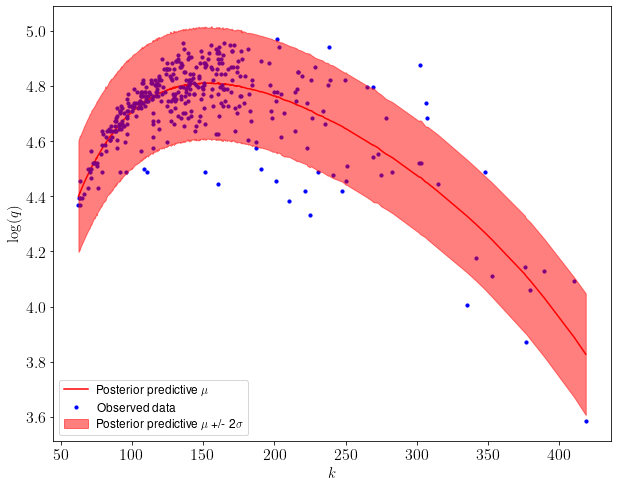

In [28]:
# Compute upper and lower bounds
q_upper = pp_mean + 2*pp_std
q_mean = pp_mean
q_lower= pp_mean - 2*pp_std

# Create figure
fig = plt.figure(figsize=(10,8))
plt.scatter(rho,log_q,label='Observed data',color='blue',zorder=2,s=10)
plt.plot(rho,q_mean,color='red',label=r'Posterior predictive $\mu$',zorder=1)
plt.fill_between(rho,q_upper,q_lower,alpha=0.5,color='red',label=f"Posterior predictive  $\mu$ +/- {2}$\sigma$",zorder=3)
# if show_title: plt.title(f"Posterior predictive for {inference_fd} FD")
plt.xlabel(f'$k$',fontsize=15)
plt.ylabel(f'$\log(q)$',fontsize=15)
plt.legend(fontsize=12)
plt.savefig(root+f'data/figures/{inference_fd}_{sensitivity}_prior_posterior_predictive.png',dpi=300)

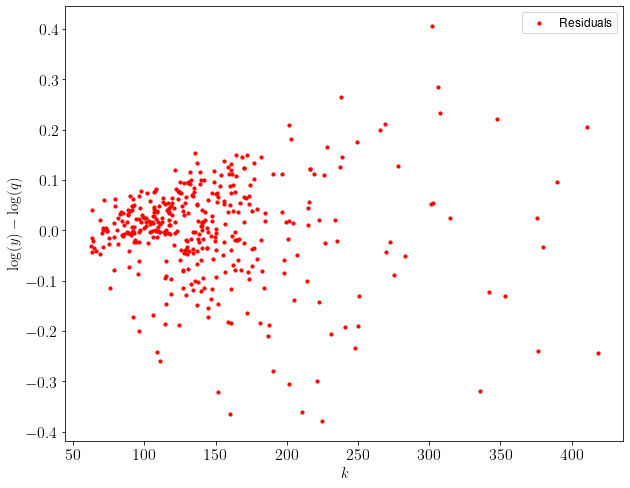

In [29]:
# Create figure
fig = plt.figure(figsize=(10,8))
plt.scatter(rho,log_q-q_mean,label='Residuals',color='red',zorder=2,s=10)
# plt.plot(rho,q_mean,color='red',label=r'$\mu$',zorder=1)
# if show_title: plt.title(f"Posterior predictive for {inference_fd} FD")
plt.xlabel(f'$k$',fontsize=15)
plt.ylabel(f'$\log(y)-\log(q)$',fontsize=15)
plt.legend(fontsize=12)
plt.savefig(root+f'data/figures/{inference_fd}_{sensitivity}_prior_posterior_predictive_residuals.png',dpi=300)